# [教學目標]
學習 sklearn 中，各種評估指標的使用與意義 <br />
<br />
# [範例重點]
注意觀察各指標的數值範圍，以及輸入函數中的資料格式<br />

In [1]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import warnings 

warnings.filterwarnings('ignore')

# 回歸問題
常見的評估指標有 <br />
<br />
MAE<br /> 
MSE<br />
R-square<br />
<br />
我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [2]:
x, y = datasets.make_regression(n_features = 1, random_state = 2019, noise = 4)
LR = LinearRegression()
LR.fit(x,y)
prediction = LR.predict(x)
mae = metrics.mean_absolute_error(prediction,y)
mse = metrics.mean_squared_error(prediction,y)
r2 = metrics.r2_score(prediction,y)

print('mae:',mae)
print('mse:',mse)
print('r2:',r2)

mae: 3.2018018959962804
mse: 16.93274235869619
r2: 0.957396938308779


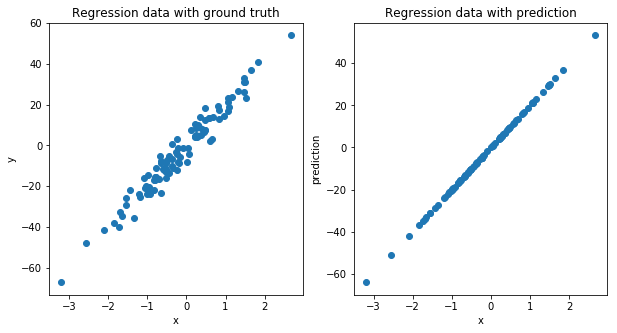

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Regression data with ground truth')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
plt.title('Regression data with prediction')
plt.scatter(x,prediction)
plt.xlabel('x')
plt.ylabel('prediction')

plt.show()

# 分類問題
常見的評估指標有 <br />
<br />
AUC<br />
F1-Score (Precision, Recall)<br />

In [4]:
cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size = 50, random_state = 2019)

In [5]:
print(y_test)

[1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 1 1]


In [6]:
y_pred = np.random.random((50,))
y_pred

array([0.1382065 , 0.48505457, 0.22330574, 0.74030773, 0.94844646,
       0.43097528, 0.23503448, 0.64731721, 0.32539602, 0.64034665,
       0.47936091, 0.82274086, 0.02031391, 0.30309815, 0.81029142,
       0.18320153, 0.98015449, 0.8585413 , 0.49051343, 0.52488801,
       0.36880653, 0.75482626, 0.15912509, 0.37277437, 0.81573053,
       0.78459289, 0.88311271, 0.13948385, 0.19154881, 0.4191898 ,
       0.38912693, 0.23657623, 0.22216747, 0.83881968, 0.93275451,
       0.38750211, 0.60349983, 0.70023702, 0.0203075 , 0.86582539,
       0.52475751, 0.61560636, 0.76820114, 0.80081054, 0.37554932,
       0.68079731, 0.41566737, 0.80202773, 0.38870253, 0.54219404])

In [8]:
auc = metrics.roc_auc_score(y_test,y_pred)
print('AUC : ',auc)

AUC :  0.5195246179966044


In [9]:
thresh = 0.5
y_pred_binarized = np.where(y_pred > thresh, 1, 0)
f1 = metrics.f1_score(y_test,y_pred_binarized)
precision = metrics.precision_score(y_test,y_pred_binarized)
recall = metrics.recall_score(y_test,y_pred_binarized)
print('f1 : ',f1)
print('precision : ',precision)
print('recall : ',recall)

f1 :  0.6071428571428571
precision :  0.68
recall :  0.5483870967741935


In [23]:
#This is how the precision estimated
total_positive = np.sum(y_pred_binarized == 1)
true_positive = np.sum( np.array( y_pred_binarized == 1 ) & np.array( y_pred_binarized == y_test ) )
pre = true_positive / total_positive
pre

0.68

In [26]:
#This is how the recall estimated
false_negative = np.sum(np.array(y_pred_binarized == 0) & np.array( y_pred_binarized != y_test))
total_correct = true_positive + false_negative
rec = true_positive / total_correct
rec

0.5483870967741935

# 練習時間
F1-Score 其實是 F-Score 中的 β 值為 1 的特例，代表 Precision 與 Recall 的權重相同 <br />
請參考 F1-score 的公式 與下圖的 F2-score 公式圖，試著寫出 F2-Score 的計算函數 <br />
<br />

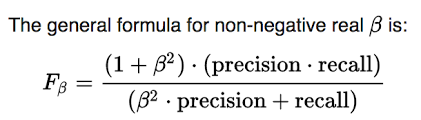

HINT: 可使用 slearn.metrics 中的 precision, recall 函數幫忙

In [28]:
y_pred = np.random.randint(2,size = 100)
y_true = np.random.randint(2,size = 100)
print(y_pred)

[1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1
 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1]


In [30]:
precision = metrics.precision_score(y_pred,y_true)
recall = metrics.recall_score(y_pred,y_true)

def f2_score(precision, recall):
    return (1+4)*(precision*recall) / (4 * precision + recall)

f2_score(precision,recall)

0.6015037593984962